In [54]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression

In [55]:
sample_submission = pd.read_csv("C:/Kaggle/House_prices/sample_submission.csv")
train = pd.read_csv("C:/Kaggle/House_prices/train.csv")
test = pd.read_csv("C:/Kaggle/House_prices/test.csv")
sample_submission.dropna()
train = train.dropna(axis=1)

(0.869671642780304, 3.206247534576162e-33)

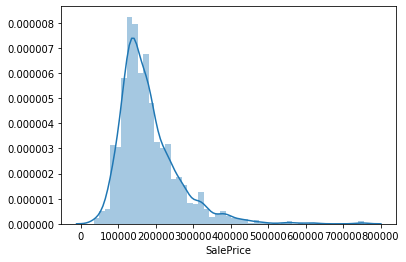

In [56]:
sns.distplot(train["SalePrice"])
stats.shapiro(train["SalePrice"])

In [57]:
# choose cov to insert in the model
covariates = []

columns = list(train.columns)
covToTest = columns[:-1]

for cov in covToTest:
  y = np.array(train["SalePrice"])
  x = np.array(train[cov])
  # find unique group labels and their corresponding indices
  label, idx = np.unique(x, return_inverse=True)
  # make a list of arrays containing the y-values corresponding to each unique label
  groups = [y[idx == i] for i, l in enumerate(label)]
  H, p = stats.kruskal(*groups)
  p = p.item()
  if (p < 0.05):
    print(cov + " has an effect on the price of the house"+ " p-value <" + str(p))
    covariates.append(cov)

MSSubClass has an effect on the price of the house p-value <1.8968600448434124e-104
MSZoning has an effect on the price of the house p-value <3.0807239995999556e-57
LotArea has an effect on the price of the house p-value <4.8408689926278795e-05
LotShape has an effect on the price of the house p-value <1.640323273843454e-32
LandContour has an effect on the price of the house p-value <1.0479232964712046e-07
LotConfig has an effect on the price of the house p-value <3.297912123318503e-07
Neighborhood has an effect on the price of the house p-value <6.696799031735812e-168
Condition1 has an effect on the price of the house p-value <6.492599567606712e-13
Condition2 has an effect on the price of the house p-value <0.013031585671629023
BldgType has an effect on the price of the house p-value <2.500857956442707e-14
HouseStyle has an effect on the price of the house p-value <1.3885066980297387e-36
OverallQual has an effect on the price of the house p-value <3.5069726379167716e-202
OverallCond ha

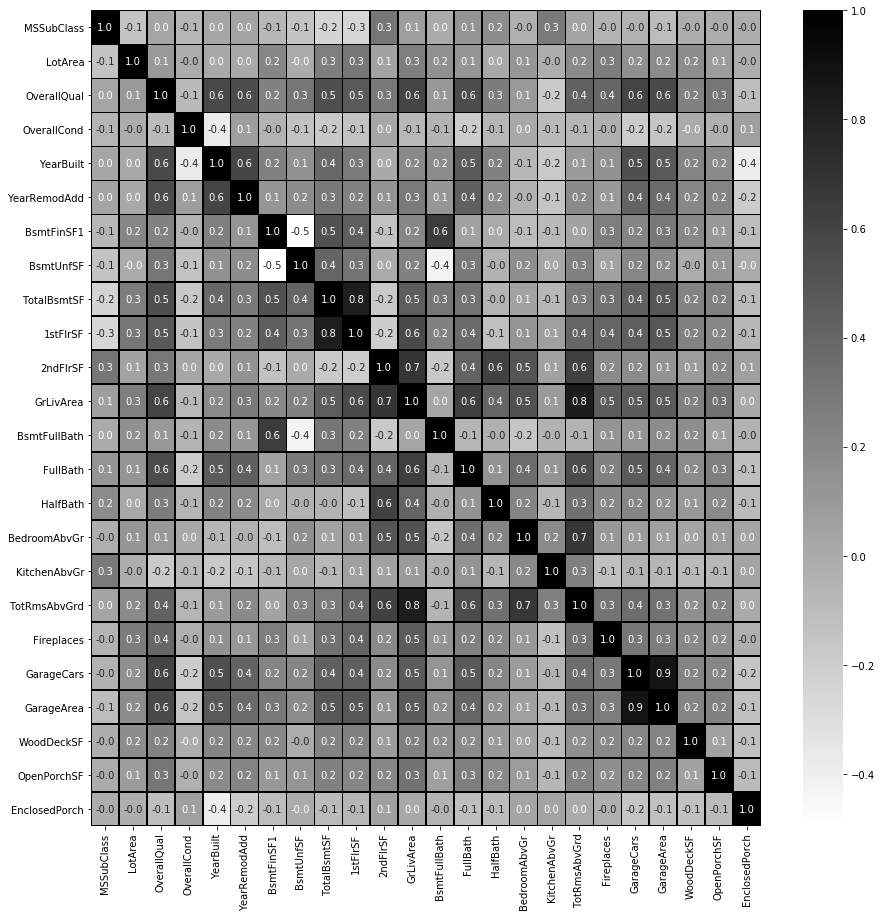

In [58]:
# see which covariates are correlated
covariatesDF = train[covariates]
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(covariatesDF.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.1f',ax=ax, cmap='gray_r')
plt.show()

In [59]:
# Train the model and make predictions
X = pd.get_dummies(covariatesDF)  # values converts it into a numpy array
Y = train["SalePrice"] # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
test = pd.get_dummies(test) 
Y_pred = linear_regressor.predict(X)  # make predictions
train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [60]:
list(Y_pred)

[211242.2168860893,
 199018.35913532076,
 212723.2027405001,
 169319.82420211972,
 296866.81830518495,
 139678.10346472205,
 266713.1570580484,
 224203.33369412448,
 136272.42080265342,
 126516.73738188145,
 135164.51563683606,
 405019.55247870984,
 135033.1975111215,
 225361.91996091942,
 161856.99393281539,
 144516.84825160808,
 165080.26953429112,
 104365.41227113397,
 141192.75428116962,
 132975.69867230777,
 319198.704179434,
 128870.21727404126,
 230625.19838505785,
 143747.43233280408,
 145998.56232071563,
 258112.71838876035,
 123724.12566732022,
 291578.2226163576,
 212513.54842401517,
 69846.45648232545,
 66232.59702142782,
 137689.44031160523,
 185159.63557145593,
 183173.02707829338,
 322805.1991027446,
 300898.1674790041,
 150411.71145032893,
 167032.69040375983,
 125336.81904427346,
 81343.3529364419,
 156283.44171963644,
 169175.21706615353,
 153335.62029707746,
 137598.4787279506,
 148403.4289726537,
 321415.7295882503,
 270729.2252542098,
 238503.1258905247,
 84541.264

In [61]:
#Calculate the accuracy of the model
print('Coefficients: \n', linear_regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((linear_regressor.predict(X) - Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_regressor.score(X, Y))

Coefficients: 
 [-2.64161024e+01  4.69070428e-01  7.97429161e+03  5.33776006e+03
  3.10820830e+02  1.04852272e+02  1.28655784e+01 -9.91071981e+00
  2.61746899e+01  1.54067896e+01  3.34001331e+01  4.05373091e+01
  1.35225242e+03  3.15571830e+03  1.73717207e+02 -5.56011871e+03
 -1.53506012e+04  1.31820426e+03  2.95821367e+03  4.61496558e+03
  1.19938289e+01  1.21244174e+01  1.07724081e+01  6.25936874e+00
 -2.41960996e+04  9.17538412e+03  4.35804498e+03  5.78903734e+03
  4.87363317e+03 -2.67326012e+03  2.63397315e+03  2.27209046e+03
 -2.23280349e+03 -5.19282867e+03  9.36527471e+03 -4.76109811e+03
  5.88652075e+02  2.23449605e+03  9.85049441e+03 -3.32475165e+03
 -9.96977706e+03  1.20953825e+03  5.34646480e+02 -1.83243459e+03
  9.82074303e+03  1.74496231e+03 -1.20387429e+04 -7.51069765e+03
  1.31268949e+04 -1.33159797e+04 -1.20835481e+04 -5.03996452e+03
 -3.84790759e+02 -1.51572151e+04 -1.21012237e+04  9.51426544e+03
 -1.74657074e+04  2.98548461e+04  2.53523376e+04 -1.16261223e+04
 -8.36653